## 바이브코딩을 활용한 3차원 미사일 방어 시스템: 단계별 심화 문제

### 문제 2단계: 다중 위협 분산 대응
#### 상황: 
위협이 고조되어, 5발의 미사일이 각기 다른 위치에서 도시를 향해 동시다발적으로 날아오고 있습니다. 다행히 우리에겐 2개의 방어 기지가 있습니다. 각 미사일에 대해 더 빨리 요격할 수 있는 기지가 임무를 맡아, 모든 위협을 최대한 신속하게 제거해야 합니다.
#### 주어진 조건:
- 도시 중심(원점): $(0, 0, 0)$

- 요격 기지 위치:
    - '알파' 기지 $S_A : (50, 20, 0)$
    - '브라보' 기지 $S_B : (-40, -30, 0)$

- 요격 미사일 속력 : $v_I: 150 m/s$

- 적 탄도 미사일 5발 (모두 t=0에 탐지):
    - $P_H1(t)=(250−20t,300−25t,400−4.9t^2)$
    - $P_H2(t)=(−280+22t,250−20t,380−4.9t^2)$
    - $P_H3(t)=(10−5t,−350+30t,420−4.9t^2)$
    - $P_H4(t)=(300−25t,−10−2t,350−4.9t^2)$
    - $P_H5(t)=(−200+15t,−250+20t,450−4.9t^2)$ 

#### 도전 과제:
#### 1. 최적 할당 계산:
- 5개의 모든 적 미사일($H1 ,..., H5$)에 대하여, '알파' 기지에서 요격했을 때의 시간($t_A$)과 '브라보' 기지에서 요격했을 때의 시간($t_B$)을 각각 계산하세요.
- 각 미사일마다$ t_A$와 $t_B$ 를 비교하여 더 작은 값을 갖는 기지에 요격 임무를 할당하세요.
- 최종 할당 결과(어떤 기지가 어떤 미사일을 맡는지)와 각 미사일의 최종 요격 시간 및 좌표를 모두 출력하세요.

#### 2. 통합 3D 시각화 및 애니메이션:
- 5개 미사일의 모든 궤적과 2개의 방어 기지를 3D 공간에 렌더링하세요.
- 계산된 할당 결과를 시각적으로 표현하세요. (예: '알파' 기지에서 할당된 목표물까지는 붉은색 선, '브라보' 기지에서는 푸른색 선으로 연결)
- 모든 요격 과정을 하나의 통합된 애니메이션으로 구현하세요.

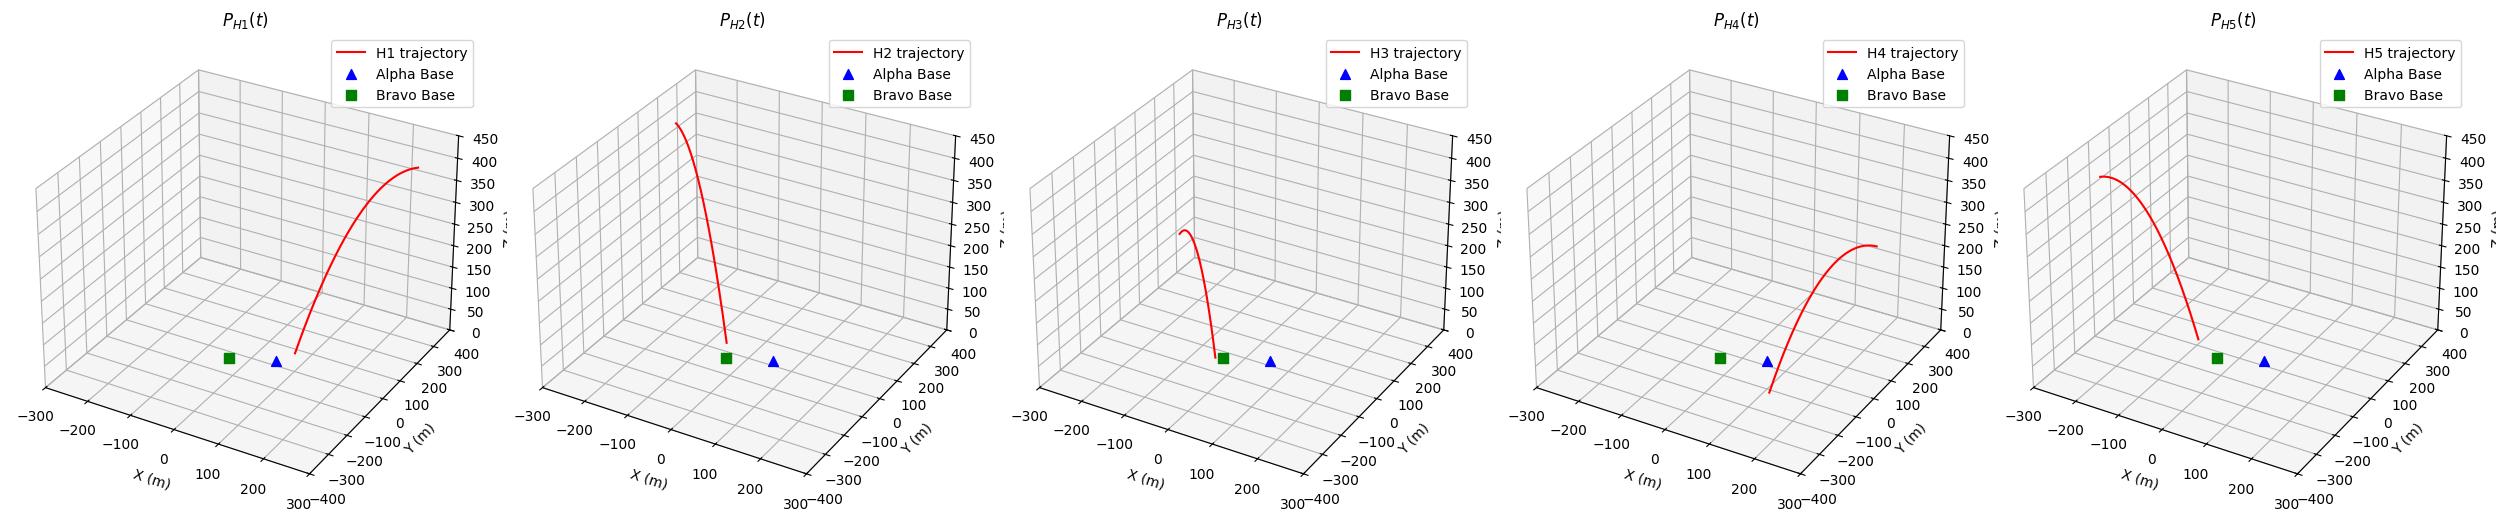

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시간 배열 (0초부터 9초까지 300포인트)
t = np.linspace(0, 9, 300)

# 방어 기지 위치
S_A = np.array([50, 20, 0])    # Alpha 기지
S_B = np.array([-40, -30, 0])  # Bravo 기지

# 각 미사일 궤적 함수 정의
def P_H1(t):
    return np.stack([250 - 20*t,
                     300 - 25*t,
                     400 - 4.9*t**2], axis=-1)

def P_H2(t):
    return np.stack([-280 + 22*t,
                     250 - 20*t,
                     380 - 4.9*t**2], axis=-1)

def P_H3(t):
    return np.stack([10 - 5*t,
                     -350 + 30*t,
                     420 - 4.9*t**2], axis=-1)

def P_H4(t):
    return np.stack([300 - 25*t,
                     -10 - 2*t,
                     350 - 4.9*t**2], axis=-1)

def P_H5(t):
    return np.stack([-200 + 15*t,
                     -250 + 20*t,
                     450 - 4.9*t**2], axis=-1)

paths = [P_H1(t), P_H2(t), P_H3(t), P_H4(t), P_H5(t)]
labels = ['H1', 'H2', 'H3', 'H4', 'H5']

# 1행 5열 서브플롯 설정
fig = plt.figure(figsize=(25, 5))
for i, (path, label) in enumerate(zip(paths, labels), start=1):
    ax = fig.add_subplot(1, 5, i, projection='3d')
    
    # 미사일 궤적
    ax.plot(path[:,0], path[:,1], path[:,2], color='red', label=f'{label} trajectory')
    
    # Alpha, Bravo 기지 표시
    ax.scatter(*S_A, color='blue', s=50, marker='^', label='Alpha Base')
    ax.scatter(*S_B, color='green', s=50, marker='s', label='Bravo Base')
    
    ax.set_title(f'$P_{{{label}}}(t)$')
    ax.set_xlabel('X (m)')
    ax.set_ylabel('Y (m)')
    ax.set_zlabel('Z (m)')
    ax.set_xlim(-300, 300)
    ax.set_ylim(-400, 400)
    ax.set_zlim(0, 450)
    
    # 범례 (각 플롯마다 중복되지 않도록 한 번만 표시)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


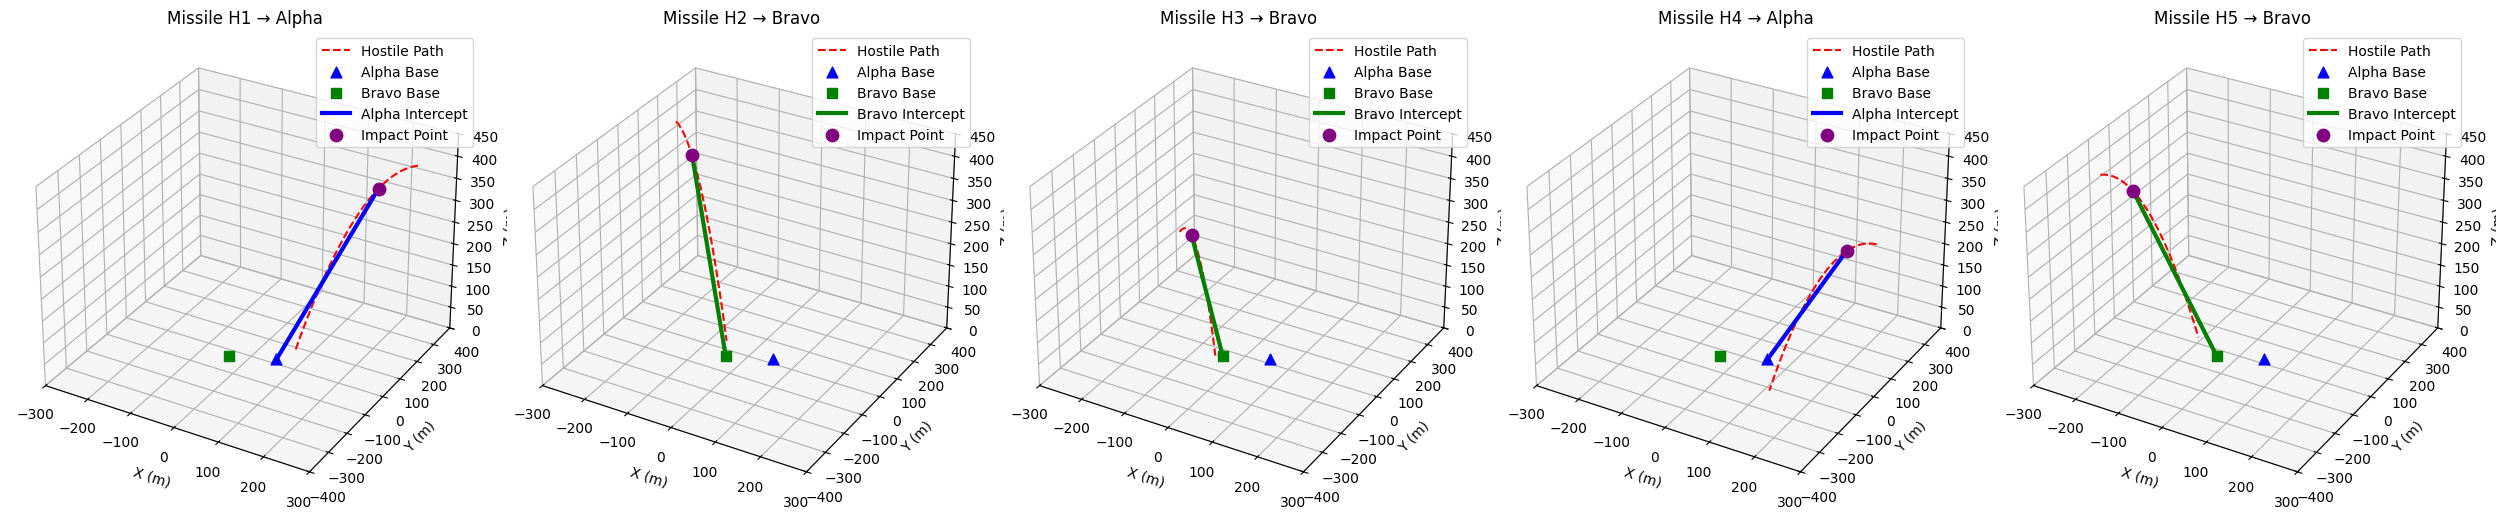

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시간 배열
t = np.linspace(0.01, 9.0, 20001)

# 방어 기지 및 속력
S_A = np.array([50.0, 20.0, 0.0])    # Alpha
S_B = np.array([-40.0, -30.0, 0.0])  # Bravo
v_I = 150.0

# 적 미사일 궤적 함수
def P_H1(t): return np.stack([250 - 20*t, 300 - 25*t, 400 - 4.9*t**2], axis=-1)
def P_H2(t): return np.stack([-280 + 22*t, 250 - 20*t, 380 - 4.9*t**2], axis=-1)
def P_H3(t): return np.stack([10 - 5*t, -350 + 30*t, 420 - 4.9*t**2], axis=-1)
def P_H4(t): return np.stack([300 - 25*t, -10 - 2*t, 350 - 4.9*t**2], axis=-1)
def P_H5(t): return np.stack([-200 + 15*t, -250 + 20*t, 450 - 4.9*t**2], axis=-1)
P_Hs = [P_H1, P_H2, P_H3, P_H4, P_H5]

# 요격 시간 계산 함수 (이분 보간)
def intercept_time(P_H, S):
    pos = P_H(t)
    dist = np.linalg.norm(pos - S, axis=1)
    f = dist - v_I*t
    idx = np.where(f[:-1]*f[1:] < 0)[0]
    if len(idx) == 0:
        return None
    i = idx[0]
    t0, t1 = t[i], t[i+1]
    f0, f1 = f[i], f[i+1]
    return t0 - f0*(t1 - t0)/(f1 - f0)

# 할당 결과 계산
assignments = []
for P_H in P_Hs:
    tA = intercept_time(P_H, S_A)
    tB = intercept_time(P_H, S_B)
    if tA is None or (tB is not None and tB < tA):
        base, t_imp, S = 'Bravo', tB, S_B
    else:
        base, t_imp, S = 'Alpha', tA, S_A
    P_imp = P_H(t_imp)
    assignments.append((base, t_imp, S, P_imp))

# 시각화
fig = plt.figure(figsize=(25, 5))
for i, (P_H, (base, t_imp, S, P_imp)) in enumerate(zip(P_Hs, assignments), start=1):
    path = P_H(t)
    ax = fig.add_subplot(1, 5, i, projection='3d')
    
    # 적 미사일 궤적
    ax.plot(path[:,0], path[:,1], path[:,2], 'r--', label='Hostile Path')
    
    # 기지 위치 표시
    ax.scatter(*S_A, color='blue', marker='^', s=60, label='Alpha Base')
    ax.scatter(*S_B, color='green', marker='s', s=60, label='Bravo Base')
    
    # 할당된 기지→충돌 지점 선
    color = 'blue' if base=='Alpha' else 'green'
    ax.plot([S[0], P_imp[0]], [S[1], P_imp[1]], [S[2], P_imp[2]],
            color=color, linewidth=3, label=f'{base} Intercept')
    
    # 충돌 지점
    ax.scatter(*P_imp, color='purple', s=80, label='Impact Point')
    
    ax.set_title(f'Missile H{i} → {base}')
    ax.set_xlabel('X (m)'); ax.set_ylabel('Y (m)'); ax.set_zlabel('Z (m)')
    ax.set_xlim(-300, 300); ax.set_ylim(-400, 400); ax.set_zlim(0, 450)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 시간 배열
t = np.linspace(0.01, 9.0, 20001)

# 방어 기지 및 속력
S_A = np.array([50.0, 20.0, 0.0])    # Alpha
S_B = np.array([-40.0, -30.0, 0.0])  # Bravo
v_I = 150.0

# 적 미사일 궤적 함수 리스트
def P_H1(t): return np.stack([250 - 20*t, 300 - 25*t, 400 - 4.9*t**2], axis=-1)
def P_H2(t): return np.stack([-280 + 22*t, 250 - 20*t, 380 - 4.9*t**2], axis=-1)
def P_H3(t): return np.stack([10 - 5*t, -350 + 30*t, 420 - 4.9*t**2], axis=-1)
def P_H4(t): return np.stack([300 - 25*t, -10 - 2*t, 350 - 4.9*t**2], axis=-1)
def P_H5(t): return np.stack([-200 + 15*t, -250 + 20*t, 450 - 4.9*t**2], axis=-1)
P_Hs = [P_H1, P_H2, P_H3, P_H4, P_H5]

# 요격 시간 계산 함수 (이분법 보간)
def intercept_time(P_H, S):
    pos = P_H(t)
    dist = np.linalg.norm(pos - S, axis=1)
    f = dist - v_I * t
    idx = np.where(f[:-1] * f[1:] < 0)[0]
    if len(idx) == 0:
        return np.nan  # 요격 불가능 시 nan 반환
    i = idx[0]
    t0, t1 = t[i], t[i+1]
    f0, f1 = f[i], f[i+1]
    return t0 - f0 * (t1 - t0) / (f1 - f0)

# 할당 및 시간 계산
rows = []
for i, P_H in enumerate(P_Hs, start=1):
    tA = intercept_time(P_H, S_A)
    tB = intercept_time(P_H, S_B)
    
    # 더 빠른 기지 할당
    if np.isnan(tA) and np.isnan(tB):
        base = None
        t_imp = np.nan
        S = np.array([np.nan, np.nan, np.nan])
    elif np.isnan(tA) or (not np.isnan(tB) and tB < tA):
        base, t_imp, S = 'Bravo', tB, S_B
    else:
        base, t_imp, S = 'Alpha', tA, S_A
    
    P_imp = P_H(t_imp) if not np.isnan(t_imp) else np.array([np.nan, np.nan, np.nan])
    
    rows.append({
        'Missile': f'H{i}',
        't_A (s)': round(tA, 4),
        't_B (s)': round(tB, 4),
        'Assigned Base': base,
        't_intercept (s)': round(t_imp, 4),
        'Base Pos': S,
        'Impact Coord': np.round(P_imp, 2)
    })

# 결과 DataFrame 출력
df = pd.DataFrame(rows)
print(df.to_string(index=False))

# (이후 시각화 코드는 이전과 동일하게 유지)


Missile  t_A (s)  t_B (s) Assigned Base  t_intercept (s)            Base Pos              Impact Coord
     H1   2.9163   3.2295         Alpha           2.9163   [50.0, 20.0, 0.0]  [191.67, 227.09, 358.33]
     H2   3.0512   2.9352         Bravo           2.9352 [-40.0, -30.0, 0.0]  [-215.43, 191.3, 337.78]
     H3   3.1148   2.9584         Bravo           2.9584 [-40.0, -30.0, 0.0]  [-4.79, -261.25, 377.11]
     H4   2.4836   2.7601         Alpha           2.4836   [50.0, 20.0, 0.0]  [237.91, -14.97, 319.77]
     H5   3.2686   3.0064         Bravo           3.0064 [-40.0, -30.0, 0.0] [-154.9, -189.87, 405.71]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from IPython.display import HTML

# 1. Parameters
v_I = 150.0
S_A = np.array([50.0, 20.0, 0.0])    # Alpha base
S_B = np.array([-40.0, -30.0, 0.0])  # Bravo base
t_vals = np.linspace(0.01, 9.0, 2001)  # time grid

# 2. Hostile missile trajectories
def P_H1(t): return np.stack([250 - 20*t,   300 - 25*t, 400 - 4.9*t**2], axis=-1)
def P_H2(t): return np.stack([-280 + 22*t,  250 - 20*t, 380 - 4.9*t**2], axis=-1)
def P_H3(t): return np.stack([10 - 5*t,    -350 + 30*t,420 - 4.9*t**2], axis=-1)
def P_H4(t): return np.stack([300 - 25*t,  -10 - 2*t,  350 - 4.9*t**2], axis=-1)
def P_H5(t): return np.stack([-200 + 15*t, -250 + 20*t,450 - 4.9*t**2], axis=-1)
P_Hs = [P_H1, P_H2, P_H3, P_H4, P_H5]

# 3. Intercept time finder (linear interpolation)
def intercept_time(P_H, S):
    pos = P_H(t_vals)
    dist = np.linalg.norm(pos - S, axis=1)
    f = dist - v_I * t_vals
    idx = np.where(f[:-1] * f[1:] < 0)[0]
    if len(idx)==0:
        return None
    i = idx[0]
    t0, t1 = t_vals[i], t_vals[i+1]
    f0, f1 = f[i], f[i+1]
    return t0 - f0*(t1-t0)/(f1-f0)

# 4. Compute intercept assignments
assignments = []
for P_H in P_Hs:
    tA = intercept_time(P_H, S_A)
    tB = intercept_time(P_H, S_B)
    if tA is None or (tB is not None and tB < tA):
        base_pos, t_imp, color = S_B, tB, 'green'
    else:
        base_pos, t_imp, color = S_A, tA, 'blue'
    u = (P_H(t_imp) - base_pos) / np.linalg.norm(P_H(t_imp) - base_pos)
    assignments.append((P_H, base_pos, t_imp, u, color))

# 5. Precompute paths
hostile_paths = [P_H(t_vals) for P_H, *_ in assignments]
interceptor_paths = [base + v_I * t_vals[:,None] * u for _, base, _, u, _ in assignments]

# 6. Set up 3D figure
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-300,300); ax.set_ylim(-400,400); ax.set_zlim(0,450)
ax.set_xlabel('X (m)'); ax.set_ylabel('Y (m)'); ax.set_zlabel('Z (m)')
ax.set_title('5-Missile Interception: Alpha (blue) vs Bravo (green)')
ax.scatter(*S_A, color='blue', marker='^', s=80, label='Alpha Base')
ax.scatter(*S_B, color='green', marker='s', s=80, label='Bravo Base')
ax.legend(loc='upper left')

# 7. Initialize line objects
hostile_lines = []
interceptor_lines = []
for i in range(5):
    hl, = ax.plot([], [], [], 'r--', linewidth=1)
    il, = ax.plot([], [], [], color=assignments[i][4], linewidth=2)
    hostile_lines.append(hl)
    interceptor_lines.append(il)

# 8. Animation functions
def init():
    for hl, il in zip(hostile_lines, interceptor_lines):
        hl.set_data([], [])
        hl.set_3d_properties([])
        il.set_data([], [])
        il.set_3d_properties([])
    return hostile_lines + interceptor_lines

def animate(frame):
    for i, (hl, il) in enumerate(zip(hostile_lines, interceptor_lines)):
        hp = hostile_paths[i][:frame]
        ip = interceptor_paths[i][:frame]
        hl.set_data(hp[:,0], hp[:,1]); hl.set_3d_properties(hp[:,2])
        il.set_data(ip[:,0], ip[:,1]); il.set_3d_properties(ip[:,2])
    return hostile_lines + interceptor_lines

ani = animation.FuncAnimation(
    fig, animate, init_func=init,
    frames=len(t_vals), interval=40, blit=True
)

# 9. Display animation inline
HTML(ani.to_jshtml())


Animation size has reached 20987703 bytes, exceeding the limit of 20971520.0. If you're sure you want a larger animation embedded, set the animation.embed_limit rc parameter to a larger value (in MB). This and further frames will be dropped.
